In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')

In [2]:
consumer_key = "AT8RQ66IIbOX5y3YYTKxBgn8U"
consumer_secret = "iCBsCfFn5AX8JVELlJHxgOBkNEMidOlYgUxJQGk1leAk3FBORc"
access_token = "330737363-lsObuMvsoYJRrhZrc4thKnW1JoCsVqLxZAOC9gTi"
access_token_secret = "F66Q6hwrAInnC8qv9Ro0ynUKrJgpppSIrO3vreKHNof9u"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

user = api.me()
print(user.name)

Avinash Jain


In [3]:
tweets = []

for page in range(1,5):
    tweets.extend(api.user_timeline(screen_name="realDonaldTrump", count=200, page=page))

print("Number of tweets extracted: {}. \n".format(len(tweets)))

Number of tweets extracted: 789. 



In [4]:
for tweet in tweets[:5]:
    print(tweet.text)

Great book! https://t.co/M6vQDrsY4Q
RT @Jim_Jordan: #BREAKING: @JudiciaryGOP just introduced a resolution condemning Democrats’ calls to pack #SCOTUS. https://t.co/FyVjHmIwBY
Our GREAT RALLY tonight in Pennsylvania. Tremendous energy! #MAGA https://t.co/kL29rJe6sh
With your VOTE, we are going to lift our nation to extraordinary new heights – we are going to turn the page foreve… https://t.co/TzKz1nUh8G
I did more in 47 months than Joe Biden did in 47 years! https://t.co/CrRSrJEEfl


In [14]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and "RT @" not in tweet.text]

df = pd.DataFrame(data=[[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets], columns=['Date', 'Tweet', 'Length', 'ID', 'Likes', 'Retweets'])
                                  

In [15]:
df.head()

,Date,Tweet,Length,ID,Likes,Retweets
0,2020-09-23 04:08:43,Great book! https://t.co/M6vQDrsY4Q,35,1308619277260468226,11411,2293
1,2020-09-23 02:28:39,Our GREAT RALLY tonight in Pennsylvania. Treme...,89,1308594096005697541,82734,18966
2,2020-09-23 01:43:48,"With your VOTE, we are going to lift our natio...",140,1308582808181329922,41942,12134
3,2020-09-23 01:30:28,I did more in 47 months than Joe Biden did in ...,79,1308579452100599808,75171,16571
4,2020-09-23 01:30:02,https://t.co/D9YXtlTpzX,23,1308579343333900288,19760,5091


In [16]:
df[df['Likes']==df['Likes'].max()]

,Date,Tweet,Length,ID,Likes,Retweets
43,2020-09-20 13:37:58,MAKE AMERICA GREAT AGAIN!,25,1307675370322145282,361071,59997


In [17]:
df['Likes'].describe()

count       441.000000
mean      78422.947846
std       55630.909816
min           0.000000
25%       38184.000000
50%       60707.000000
75%      101673.000000
max      361071.000000
Name: Likes, dtype: float64

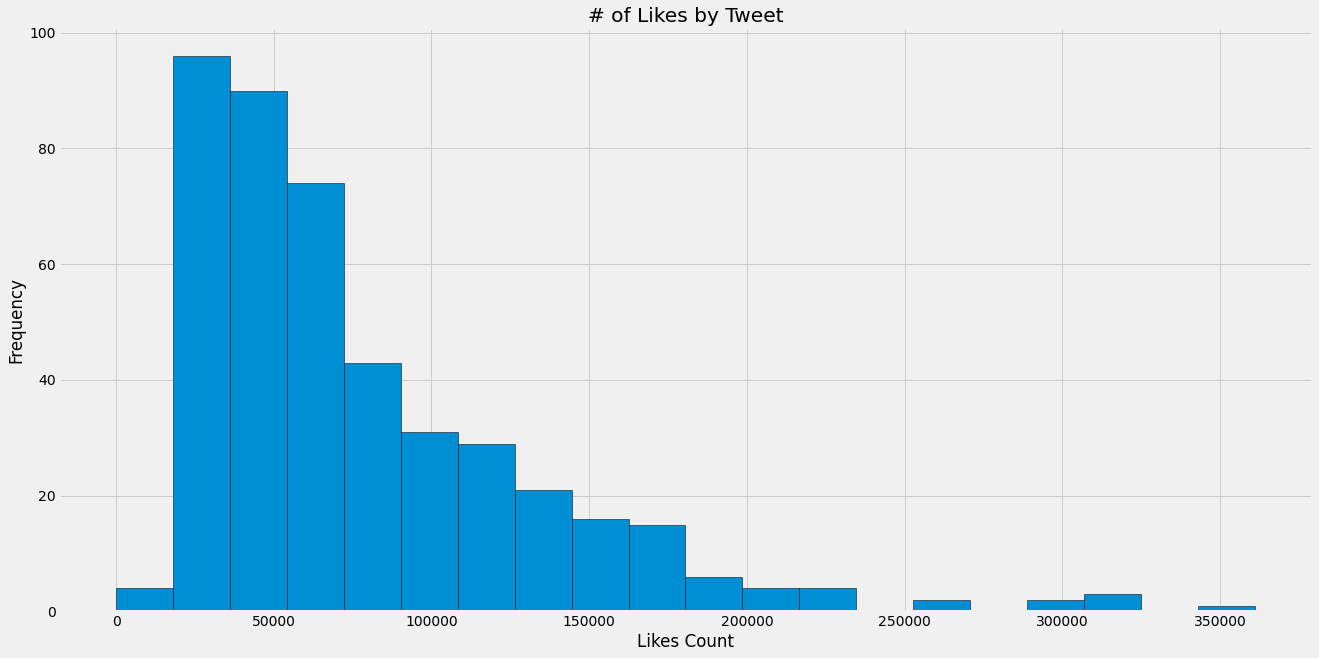

In [21]:
df['Likes'].plot(kind='hist', bins=20, figsize=(20,10), ec='black')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.title('# of Likes by Tweet')
plt.show()

In [24]:
vader = SentimentIntensityAnalyzer()
f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweet'].apply(f)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,Date,Tweet,Length,ID,Likes,Retweets,Sentiment
0,2020-09-23,Great book! https://t.co/M6vQDrsY4Q,35,1308619277260468226,11411,2293,0.6588
1,2020-09-23,Our GREAT RALLY tonight in Pennsylvania. Treme...,89,1308594096005697541,82734,18966,0.8034
2,2020-09-23,"With your VOTE, we are going to lift our natio...",140,1308582808181329922,41942,12134,0.0000
3,2020-09-23,I did more in 47 months than Joe Biden did in ...,79,1308579452100599808,75171,16571,0.0000
4,2020-09-23,https://t.co/D9YXtlTpzX,23,1308579343333900288,19760,5091,0.0000


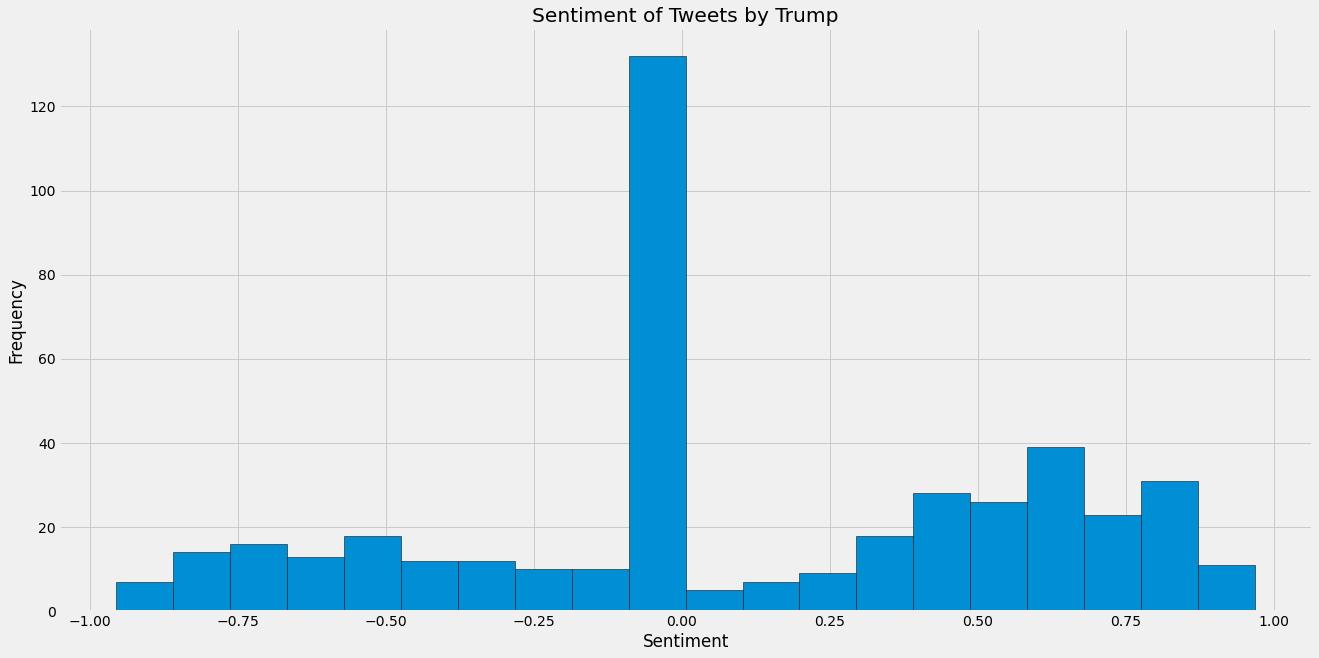

In [28]:
df['Sentiment'].plot(kind='hist', bins=20, figsize=(20,10), ec='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment of Tweets by Trump')
plt.show()

In [29]:
date_df = df.groupby(['Date']).mean().reset_index()

Text(0.5, 1.0, 'Daily Average Sentiment of Tweets')

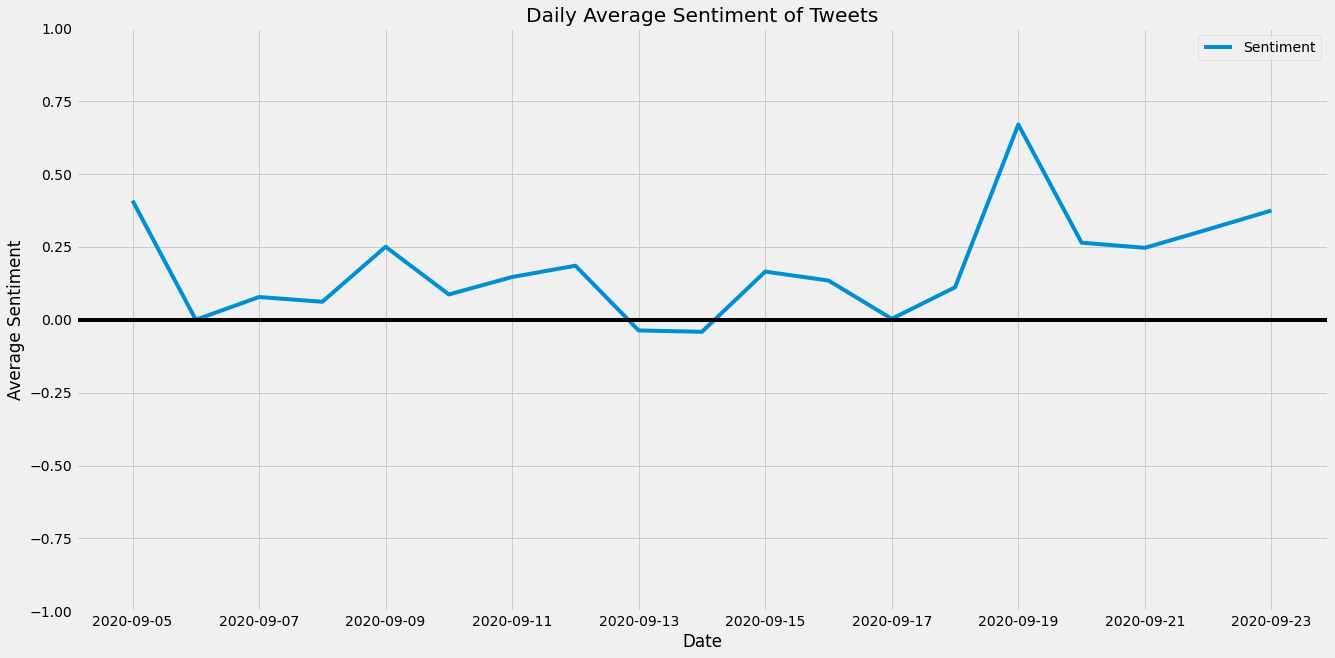

In [33]:
date_df.plot(kind='line', x='Date', y='Sentiment', figsize=(20,10), ylim=[-1,1])
plt.axhline(y=0, color='black')
plt.ylabel('Average Sentiment')
plt.title('Daily Average Sentiment of Tweets')

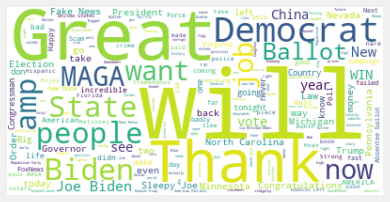

In [38]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(text for text in df.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(["HTTPS", "CO"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()